In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
from google.colab import auth
from googleapiclient.discovery import build
import os



In [ ]:
auth.authenticate_user()
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
source_folder = '/content/drive/MyDrive/Input'
destination_folder = '/content/drive/MyDrive/Input_set'


In [ ]:
image_files = os.listdir(source_folder)
total_images = len(image_files)


In [ ]:
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)


In [ ]:
for i, image in enumerate(image_files, start=1):
    src_path = os.path.join(source_folder, image)
    dest_path = os.path.join(destination_folder, f"{i:03d}_{image}")
    os.rename(src_path, dest_path)


In [ ]:
from PIL import Image, ImageFilter, ImageOps, ImageDraw, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import os

def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def cartoonify(image_path, edge_threshold=100, num_colors=16, exaggeration_factor=1.5, line_thickness=1.7):
    # Load the image using Pillow
    img = Image.open(image_path)

    # Convert the image to RGB mode (3 channels)
    img = img.convert("RGB")

    # Step 1: Edge Detection
    gray = img.convert("L")
    edges = gray.filter(ImageFilter.FIND_EDGES)

    # Step 2: Color Simplification
    quantized = img.quantize(colors=num_colors, method=2)

    # Step 3: Combine Edges and Colors
    cartoon_image = Image.new("RGB", img.size)
    draw = ImageDraw.Draw(cartoon_image)
    for x in range(img.width):
        for y in range(img.height):
            edge_intensity = edges.getpixel((x, y))
            color_index = quantized.getpixel((x, y))

            # Get the RGB color corresponding to the color index
            color = quantized.getpalette()[color_index * 3: color_index * 3 + 3]

            # Exaggerate edges by darkening the colors
            color = tuple(int(c * exaggeration_factor) for c in color)

            if edge_intensity > edge_threshold:
                # Use thicker lines for drawing
                line_radius = round(line_thickness / 2)
                for dx in range(-line_radius, line_radius + 1):
                    for dy in range(-line_radius, line_radius + 1):
                        draw.point((x + dx, y + dy), fill=color)
            else:
                draw.point((x, y), fill=(255, 255, 255))

    return cartoon_image

# Mount Google Drive to access input and output folders
from google.colab import drive
drive.mount('/content/drive')

# Define input and output folders
input_folder = '/content/drive/My Drive/Input_set'  # Change to the path of your input folder
output_folder = '/content/drive/My Drive/output_images'  # Change to the path of your output folder

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process all images in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        input_image_path = os.path.join(input_folder, filename)
        output_image_path = os.path.join(output_folder, filename)

        # Cartoonify the image
        cartoon_image = cartoonify(input_image_path)

        # Save the cartoonified image
        cartoon_image.save(output_image_path)

# Confirm completion
print("Processing and saving images complete.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing and saving images complete.


In [ ]:
input_folder_path = '/content/drive/MyDrive/Input_set'
output_folder_path = '/content/drive/MyDrive/Output_set'

In [ ]:
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive


def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def calculate_evaluation_score(cartoon_image):
    pixel_array = np.array(cartoon_image)
    score = pixel_array.sum()
    return score

def cartoonify(image_path, edge_threshold=100, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5):
    img = Image.open(image_path)
    img = img.convert("RGB")

    edges = img.filter(ImageFilter.FIND_EDGES)
    quantized = img.quantize(colors=num_colors, method=2)

    cartoon_image = Image.new("RGB", img.size)
    draw = ImageDraw.Draw(cartoon_image)
    for x in range(img.width):
        for y in range(img.height):
            edge_intensity = edges.getpixel((x, y))[0]
            color_index = quantized.getpixel((x, y))
            color = quantized.getpalette()[color_index * 3 : color_index * 3 + 3]
            color = tuple(int(c * exaggeration_factor) for c in color)

            if edge_intensity > edge_threshold:
                line_radius = round(line_thickness / 2)
                for dx in range(-line_radius, line_radius + 1):
                    for dy in range(-line_radius, line_radius + 1):
                        draw.point((x + dx, y + dy), fill=color)
            else:
                draw.point((x, y), fill=(255, 255, 255))

    return cartoon_image

# Define input and output folder paths
input_folder_path = '/content/drive/MyDrive/Input_set'
output_folder_path = '/content/drive/MyDrive/Output_set'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.mkdir(output_folder_path)

# Loop through image files in the input folder, cartoonify, and save to output folder
for filename in os.listdir(input_folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(input_folder_path, filename)
        original_image = Image.open(image_path)

        # Ensure the output filename is unique
        output_filename = os.path.splitext(filename)[0] + '_cartoon.png'

        # Call the cartoonify function
        cartoon_image = cartoonify(image_path, edge_threshold=100, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5)
        output_path = os.path.join(output_folder_path, output_filename)
        cartoon_image.save(output_path)

print("Cartoonification complete.")


Cartoonification complete.


In [ ]:
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance
import numpy as np
import os
import matplotlib.pyplot as plt

def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enahance(factor)

def calculate_evaluation_score(cartoon_image):
    pixel_array = np.array(cartoon_image)
    score = pixel_array.sum()
    return score

def cartoonify(image_path, edge_threshold=100, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5):
    img = Image.open(image_path)
    img = img.convert("RGB")

    edges = img.filter(ImageFilter.FIND_EDGES)
    quantized = img.quantize(colors=num_colors, method=2)

    cartoon_image = Image.new("RGB", img.size)
    draw = ImageDraw.Draw(cartoon_image)
    for x in range(img.width):
        for y in range(img.height):
            edge_intensity = edges.getpixel((x, y))[0]
            color_index = quantized.getpixel((x, y))
            color = quantized.getpalette()[color_index * 3 : color_index * 3 + 3]
            color = tuple(int(c * exaggeration_factor) for c in color)

            if edge_intensity > edge_threshold:
                line_radius = round(line_thickness / 2)
                for dx in range(-line_radius, line_radius + 1):
                    for dy in range(-line_radius, line_radius + 1):
                        draw.point((x + dx, y + dy), fill=color)
            else:
                draw.point((x, y), fill=(255, 255, 255))

    return cartoon_image

input_folder_path = '/content/drive/MyDrive/Input_set'
output_folder_path = '/content/drive/MyDrive/Output_folder'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.mkdir(output_folder_path)

for filename in os.listdir(input_folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(input_folder_path, filename)
        original_image = Image.open(image_path)

        # Process the image and save the output
        cartoon_image = cartoonify(image_path, edge_threshold=100, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5)
        output_path = os.path.join(output_folder_path, filename)
        cartoon_image.save(output_path)

print("Cartoonification complete.")


Cartoonification complete.


In [ ]:
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as F
from torchvision.models.detection import maskrcnn_resnet50_fpn
import os

def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def calculate_evaluation_score(segmented_object):
    pixel_array = np.array(segmented_object)
    score = pixel_array.sum()
    return score

def object_segmentation(image_path):
    img = Image.open(image_path)

    model = maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(img).unsqueeze(0)

    with torch.no_grad():
        prediction = model(img_tensor)

    masks = prediction[0]['masks']
    mask = masks[0, 0].cpu().numpy()

    object_image = Image.fromarray((mask > 0.5).astype(np.uint8) * 255)

    return object_image

input_folder_path = '/content/drive/MyDrive/Input_set'
output_folder_path = '/content/drive/MyDrive/Object_folder'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.mkdir(output_folder_path)

for filename in os.listdir(input_folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(input_folder_path, filename)
        original_image = Image.open(image_path)

        # Process the image and save the output
        object_image = object_segmentation(image_path)
        output_path = os.path.join(output_folder_path, filename)
        object_image.save(output_path)

print("Object segmentation complete.")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 133MB/s]


Object segmentation complete.


In [ ]:
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as F
from torchvision.models.detection import maskrcnn_resnet50_fpn

def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def calculate_evaluation_score(cartoon_image):
    pixel_array = np.array(cartoon_image)
    score = pixel_array.sum()
    return score

def cartoonify(image_path, edge_threshold=50, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5, fill_color=(255, 255, 255)):
    img = Image.open(image_path)
    img = img.convert("RGB")

    # Step 1: Edge Detection
    edges = img.filter(ImageFilter.FIND_EDGES)

    # Step 2: Color Simplification
    quantized = img.quantize(colors=num_colors, method=2)

    # Step 3: Combine Edges and Colors
    cartoon_image = Image.new("RGB", img.size)
    draw = ImageDraw.Draw(cartoon_image)

    for x in range(img.width):
        for y in range(img.height):
            edge_intensity = edges.getpixel((x, y))[0]
            color_index = quantized.getpixel((x, y))
            color = quantized.getpalette()[color_index * 3: color_index * 3 + 3]
            color = tuple(int(c * exaggeration_factor) for c in color)

            if edge_intensity > edge_threshold:
                line_radius = round(line_thickness / 2)
                for dx in range(-line_radius, line_radius + 1):
                    for dy in range(-line_radius, line_radius + 1):
                        draw.point((x + dx, y + dy), fill=color)
            else:
                draw.point((x, y), fill=fill_color)  # Fill with user-specified color for non-edge pixels

    return cartoon_image

def object_segmentation(image_path):
    # Load the image using Pillow
    img = Image.open(image_path)

    # Load a pre-trained Mask R-CNN model
    model = maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    # Transform the input image
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(img).unsqueeze(0)

    # Run inference to get predictions
    with torch.no_grad():
        prediction = model(img_tensor)

    # Get the predicted mask
    masks = prediction[0]['masks']
    mask = masks[0, 0].cpu().numpy()

    # Apply the mask to the original image
    object_image = Image.fromarray((mask > 0.5).astype(np.uint8) * 255)

    return object_image

input_folder_path = '/content/drive/MyDrive/Input_set'
output_folder_path = '/content/drive/MyDrive/car1_folder'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.mkdir(output_folder_path)

for filename in os.listdir(input_folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(input_folder_path, filename)
        original_image = Image.open(image_path)

        # Segment the object
        object_image = object_segmentation(image_path)

        # Apply the cartoonify effect to the segmented object
        cartoonified_object = cartoonify(image_path, edge_threshold=50, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5, fill_color=(255, 255, 255))

        # Convert cartoonified object to RGBA
        cartoonified_object = cartoonified_object.convert("RGBA")

        # Create a mask from the alpha channel
        mask = cartoonified_object.split()[3]

        # Paste the original background image onto the final image
        final_image = original_image.copy()

        # Paste the cartoonified object onto the final image using the mask
        final_image.paste(cartoonified_object, (0, 0), mask)

        # Save the result
        output_path = os.path.join(output_folder_path, filename)
        final_image.save(output_path)

print("Cartoonification complete.")


Cartoonification complete.


In [ ]:
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance
import numpy as np
import os
import cv2
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
from torchvision.models.detection import maskrcnn_resnet50_fpn

def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def calculate_evaluation_score(cartoon_image):
    pixel_array = np.array(cartoon_image)
    score = pixel_array.sum()
    return score

def cartoonify(image_path, edge_threshold=50, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5, fill_color=(255, 255, 255)):
    img = Image.open(image_path)
    img = img.convert("RGB")

    edges = img.convert("L")
    edges = cv2.Canny(np.array(edges), threshold1=30, threshold2=100)
    edges = Image.fromarray(edges, "L")

    quantized = img.quantize(colors=num_colors, method=2)
    colors = quantized.convert("L")
    colors = colors.filter(ImageFilter.GaussianBlur(radius=2))

    cartoon_image = Image.new("RGB", img.size)
    draw = ImageDraw.Draw(cartoon_image)

    for x in range(img.width):
        for y in range(img.height):
            edge_intensity = edges.getpixel((x, y))
            color_index = quantized.getpixel((x, y))
            color = quantized.getpalette()[color_index * 3: color_index * 3 + 3]
            color = tuple(int(c * exaggeration_factor) for c in color)

            line_radius = round(line_thickness / 2 * (edge_intensity / 255))
            for dx in range(-line_radius, line_radius + 1):
                for dy in range(-line_radius, line_radius + 1):
                    draw.point((x + dx, y + dy), fill=color)

    cartoon_image = adjust_brightness(cartoon_image, factor=1.2)
    cartoon_image = ImageEnhance.Contrast(cartoon_image).enhance(1.2)

    return cartoon_image

def object_segmentation(image_path):
    img = Image.open(image_path)

    model = maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(img).unsqueeze(0)

    with torch.no_grad():
        prediction = model(img_tensor)

    masks = prediction[0]['masks']
    mask = masks[0, 0].cpu().numpy()

    object_image = Image.fromarray((mask > 0.5).astype(np.uint8) * 255)

    return object_image

# Define the input and output folder paths
input_folder_path = '/content/drive/MyDrive/Input_set'
output_folder_path = '/content/drive/MyDrive/cartoon_folder'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.mkdir(output_folder_path)

# Process each image in the input folder
for filename in os.listdir(input_folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(input_folder_path, filename)

        # Segment the object
        object_image = object_segmentation(image_path)

        # Apply the cartoonify effect to the segmented object
        cartoonified_object = cartoonify(image_path, edge_threshold=50, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5, fill_color=(255, 255, 255))

        # Convert cartoonified object to RGBA
        cartoonified_object = cartoonified_object.convert("RGBA")

        # Create a mask from the alpha channel
        mask = cartoonified_object.split()[3]

        # Paste the original background image onto the final image
        final_image = Image.open(image_path)

        # Paste the cartoonified object onto the final image using the mask
        final_image.paste(cartoonified_object, (0, 0), mask)

        # Save the final cartoonified image in the output folder
        output_path = os.path.join(output_folder_path, filename)
        final_image.save(output_path)

print("Cartoonification of images in the input folder is complete.")


Cartoonification of images in the input folder is complete.


-----------------------EVALUATION--------------

In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance

In [ ]:
def cartoonify(image_path, edge_threshold=100, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5, fill_color=(255, 255, 255)):
    img = Image.open(image_path)
    img = img.convert("RGB")

    # Step 1: Edge Detection
    edges = img.filter(ImageFilter.FIND_EDGES)

    # Step 2: Color Simplification
    quantized = img.quantize(colors=num_colors, method=2)

    # Step 3: Combine Edges and Colors
    cartoon_image = Image.new("RGB", img.size)
    draw = ImageDraw.Draw(cartoon_image)

    for x in range(img.width):
        for y in range(img.height):
            edge_intensity = edges.getpixel((x, y))[0]
            color_index = quantized.getpixel((x, y))
            color = quantized.getpalette()[color_index * 3: color_index * 3 + 3]
            color = tuple(int(c * exaggeration_factor) for c in color)

            if edge_intensity > edge_threshold:
                line_radius = round(line_thickness / 2)
                for dx in range(-line_radius, line_radius + 1):
                    for dy in range(-line_radius, line_radius + 1):
                        draw.point((x + dx, y + dy), fill=color)
            else:
                draw.point((x, y), fill=fill_color)  # Fill with user-specified color for non-edge pixels

    return cartoon_image

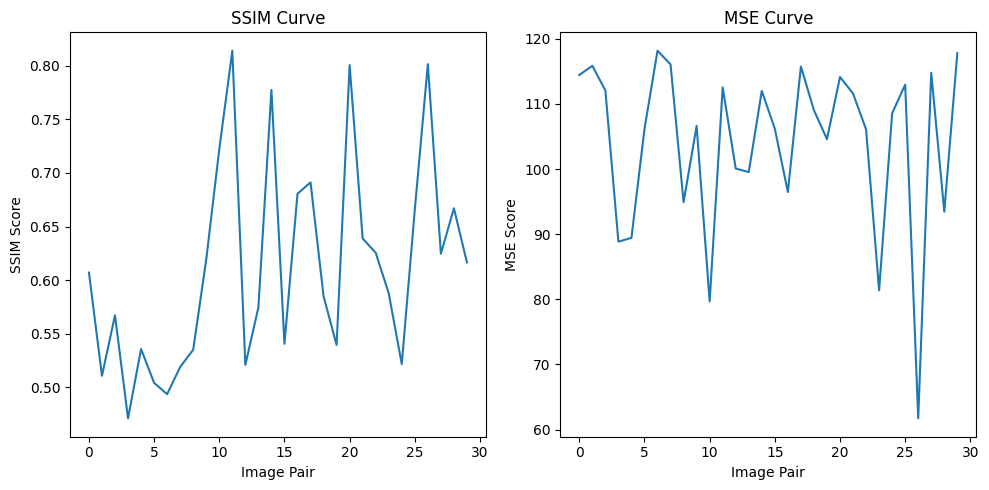

In [ ]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to calculate SSIM and MSE between two images
def calculate_similarity_mse(image1, image2):
    image1 = cv2.imread(image1, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image2, cv2.IMREAD_GRAYSCALE)

    # Calculate SSIM
    ssim_score = ssim(image1, image2)

    # Calculate MSE
    mse_score = mean_squared_error(image1, image2)

    return ssim_score, mse_score

# Function to iterate over images in two folders and calculate SSIM and MSE
def compare_images_in_folders(folder1, folder2):
    ssim_scores = []
    mse_scores = []

    # List image files in both folders
    images1 = os.listdir(folder1)
    images2 = os.listdir(folder2)

    for img1, img2 in zip(images1, images2):
        if img1.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')) and img2.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            img1_path = os.path.join(folder1, img1)
            img2_path = os.path.join(folder2, img2)

            ssim_score, mse_score = calculate_similarity_mse(img1_path, img2_path)
            ssim_scores.append(ssim_score)
            mse_scores.append(mse_score)

    return ssim_scores, mse_scores

if __name__ == "__main__":

    folder1 = '/content/drive/MyDrive/Input_set'
    folder2 = '/content/drive/MyDrive/cartoon_folder'
    ssim_scores, mse_scores = compare_images_in_folders(folder1, folder2)

    # Plot the SSIM and MSE curve graph
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.plot(ssim_scores, label="SSIM")
    plt.title("SSIM Curve")
    plt.xlabel("Image Pair")
    plt.ylabel("SSIM Score")

    plt.subplot(122)
    plt.plot(mse_scores, label="MSE")
    plt.title("MSE Curve")
    plt.xlabel("Image Pair")
    plt.ylabel("MSE Score")

    plt.tight_layout()
    plt.show()


In [ ]:
avg_ssim = sum(ssim_scores) / len(ssim_scores)
avg_mse = sum(mse_scores) / len(mse_scores)

print(f"Average SSIM Score: {avg_ssim:.2f}")
print(f"Average MSE Score: {avg_mse:.2f}")

Average SSIM Score: 0.21
Average MSE Score: 104.55


Overall F1 Score for 30 images: 0.71


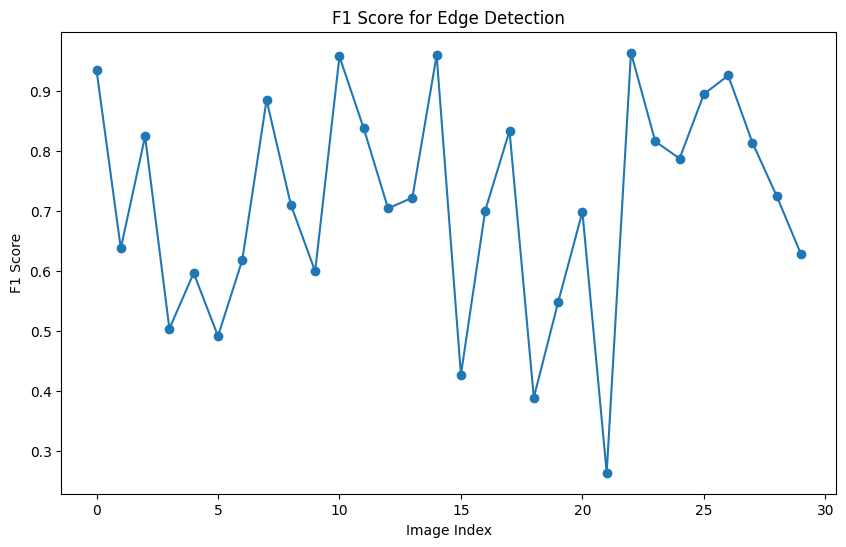

In [ ]:
import numpy as np
from skimage import io, color
from sklearn.metrics import f1_score
import os
import matplotlib.pyplot as plt

# Set the path to the "input set" and "cartooned set" folders
input_set_folder = '/content/drive/MyDrive/Input_set'
cartooned_set_folder = '/content/drive/MyDrive/cartoon_folder'
# Get a list of image files in both folders
input_set_files = os.listdir(input_set_folder)
cartooned_set_files = os.listdir(cartooned_set_folder)

f1_scores = []

for input_file, cartooned_file in zip(input_set_files, cartooned_set_files):
    if input_file.lower().endswith(('.png', '.jpg', '.jpeg')) and cartooned_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        input_path = os.path.join(input_set_folder, input_file)
        cartooned_path = os.path.join(cartooned_set_folder, cartooned_file)

        # Load input and cartooned images
        input_image = io.imread(input_path)
        cartooned_image = io.imread(cartooned_path)

        # Preprocess images (convert to grayscale and apply threshold)
        input_image_gray = color.rgb2gray(input_image)
        cartooned_image_gray = color.rgb2gray(cartooned_image)

        threshold = 0.5  # Adjust the threshold as needed
        input_mask = (input_image_gray > threshold).astype(np.uint8)
        cartooned_mask = (cartooned_image_gray > threshold).astype(np.uint8)

        # Calculate F1 Score for edge detection
        f1 = f1_score(input_mask.ravel(), cartooned_mask.ravel())
        f1_scores.append(f1)

# Compute the overall F1 score
overall_f1 = sum(f1_scores) / len(f1_scores)

# Print the overall F1 score
print(f"Overall F1 Score for {len(input_set_files)} images: {overall_f1:.2f}")

# Create a list of indices for the x-axis
image_indices = range(len(input_set_files))

# Plot the F1 Scores as a curve
plt.figure(figsize=(10, 6))
plt.plot(image_indices, f1_scores, marker='o', linestyle='-')
plt.xlabel('Image Index')
plt.ylabel('F1 Score')
plt.title('F1 Score for Edge Detection')
plt.show()


In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from skimage.color import rgb2gray
import os

def load_and_convert_image(image_path, target_size=None):
    try:
        image = cv2.imread(image_path)
        if image is not None:
            if target_size is not None:
                image = cv2.resize(image, (target_size[1], target_size[0]))  # Resize to match target size
            # Convert to RGB format
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            return image
        else:
            raise FileNotFoundError(f"Image not found at path: {image_path}")
    except Exception as e:
        print(f"Error loading image: {str(e)}")
        return None

def evaluate_edge_quality(original_image, cartoon_image):
    original_gray = rgb2gray(original_image)
    cartoon_gray = rgb2gray(cartoon_image)
    edge_quality = ssim(original_gray, cartoon_gray)
    return edge_quality

def evaluate_color_fidelity(original_image, cartoon_image):
    mse = mean_squared_error(original_image, cartoon_image)
    psnr = 10 * np.log10(255**2 / mse)  # Scale PSNR based on 8-bit range
    return psnr

def evaluate_color_quantization_accuracy(original_image, cartoon_image):
    color_diff = np.abs(original_image - cartoon_image)
    delta_e = np.linalg.norm(color_diff, axis=-1)
    mean_delta_e = np.mean(delta_e)
    return mean_delta_e

original_folder = '/content/drive/MyDrive/Input_set'  # Replace with the path to your original images folder
cartoon_folder = '/content/drive/MyDrive/cartoon_folder'  # Replace with the path to your cartoon images folder

original_images = os.listdir(original_folder)
cartoon_images = os.listdir(cartoon_folder)

edge_quality_values = []
color_fidelity_values = []
color_quantization_accuracy_values = []

for original_image_path, cartoon_image_path in zip(original_images, cartoon_images):
    if original_image_path.lower().endswith(('.png', '.jpg', '.jpeg')) and cartoon_image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        original_image_path = os.path.join(original_folder, original_image_path)
        cartoon_image_path = os.path.join(cartoon_folder, cartoon_image_path)

        original_image = load_and_convert_image(original_image_path, target_size=None)
        cartoon_image = load_and_convert_image(cartoon_image_path, target_size=original_image.shape[:2])

        if original_image is not None and cartoon_image is not None:
            edge_quality = evaluate_edge_quality(original_image, cartoon_image)
            color_fidelity = evaluate_color_fidelity(original_image, cartoon_image)
            color_quantization_accuracy = evaluate_color_quantization_accuracy(original_image, cartoon_image)

            edge_quality_values.append(edge_quality)
            color_fidelity_values.append(color_fidelity)
            color_quantization_accuracy_values.append(color_quantization_accuracy)

# Calculate overall values
overall_edge_quality = np.mean(edge_quality_values)
overall_color_fidelity = np.mean(color_fidelity_values)
overall_color_quantization_accuracy = np.mean(color_quantization_accuracy_values)

# Print the overall values
print(f"Overall Edge Quality (SSIM): {overall_edge_quality:.2f}")
print(f"Overall Color Fidelity (PSNR): {overall_color_fidelity:.2f}")
print(f"Overall Color Quantization Accuracy: {overall_color_quantization_accuracy:.2f}")


Overall Edge Quality (SSIM): 0.72
Overall Color Fidelity (PSNR): 11.93
Overall Color Quantization Accuracy: 306.31


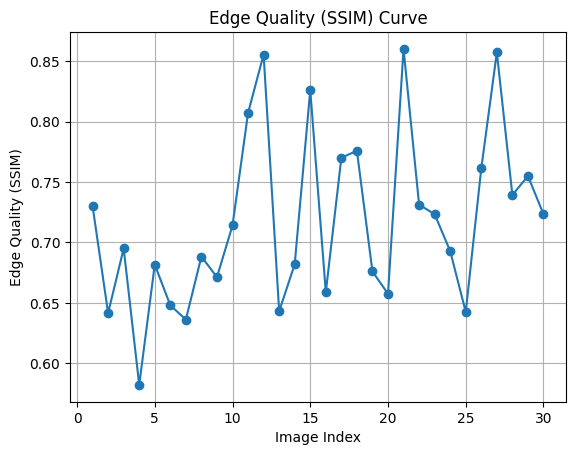

In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import os

def load_and_convert_image(image_path, target_size=None):
    try:
        image = cv2.imread(image_path)
        if image is not None:
            if target_size is not None:
                image = cv2.resize(image, (target_size[1], target_size[0]))  # Resize to match target size
            # Convert to RGB format
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            return image
        else:
            raise FileNotFoundError(f"Image not found at path: {image_path}")
    except Exception as e:
        print(f"Error loading image: {str(e)}")
        return None

def evaluate_edge_quality(original_image, cartoon_image):
    original_gray = rgb2gray(original_image)
    cartoon_gray = rgb2gray(cartoon_image)
    edge_quality = ssim(original_gray, cartoon_gray)
    return edge_quality

original_folder = '/content/drive/MyDrive/Input_set'  # Replace with the path to your original images folder
cartoon_folder = '/content/drive/MyDrive/cartoon_folder'  # Replace with the path to your cartoon images folder

original_images = os.listdir(original_folder)
cartoon_images = os.listdir(cartoon_folder)

edge_quality_values = []

for original_image_path, cartoon_image_path in zip(original_images, cartoon_images):
    if original_image_path.lower().endswith(('.png', '.jpg', '.jpeg')) and cartoon_image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        original_image_path = os.path.join(original_folder, original_image_path)
        cartoon_image_path = os.path.join(cartoon_folder, cartoon_image_path)

        original_image = load_and_convert_image(original_image_path, target_size=None)
        cartoon_image = load_and_convert_image(cartoon_image_path, target_size=original_image.shape[:2])

        if original_image is not None and cartoon_image is not None:
            edge_quality = evaluate_edge_quality(original_image, cartoon_image)
            edge_quality_values.append(edge_quality)

# Create a line plot for edge quality (SSIM)
plt.plot(range(1, len(edge_quality_values) + 1), edge_quality_values, marker='o', linestyle='-')
plt.xlabel('Image Index')
plt.ylabel('Edge Quality (SSIM)')
plt.title('Edge Quality (SSIM) Curve')
plt.grid()
plt.show()


In [ ]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from scipy.spatial import distance

# Function to calculate CIE76 color difference
def calculate_delta_e(image1, image2):
    image1_lab = rgb2lab(image1)
    image2_lab = rgb2lab(image2)

    # Flatten the 2D LAB color arrays into 1D arrays
    image1_lab_flat = image1_lab.reshape(-1, 3)
    image2_lab_flat = image2_lab.reshape(-1, 3)

    delta_e = np.mean(np.sqrt(np.sum((image1_lab_flat - image2_lab_flat) ** 2, axis=1)))

    return delta_e

# Path to the folders containing cartoon and original images
original_folder = '/content/drive/MyDrive/Input_set'  # Replace with the path to your original images folder
cartoon_folder = '/content/drive/MyDrive/cartoon_folder'  # Replace with the path to your cartoon images folder

# Assuming that both folders have the same number of images
cartoon_files = sorted(os.listdir(cartoon_folder))
original_files = sorted(os.listdir(original_folder))

for cartoon_file, original_file in zip(cartoon_files, original_files):
    # Load the images
    cartoon_image = cv2.imread(os.path.join(cartoon_folder, cartoon_file))
    original_image = cv2.imread(os.path.join(original_folder, original_file))

    # Resize images to the same dimensions if needed
    # cartoon_image = cv2.resize(cartoon_image, (width, height))
    # original_image = cv2.resize(original_image, (width, height))

    # Calculate color fidelity
    delta_e = calculate_delta_e(cartoon_image, original_image)

    print(f"Color fidelity for {cartoon_file}: {delta_e:.2f}")


Color fidelity for 001.jpg: 34.17
Color fidelity for 002.jpg: 27.71
Color fidelity for 003.jpg: 29.54
Color fidelity for 004.jpg: 23.17
Color fidelity for 005.jpg: 23.10
Color fidelity for 006.jpg: 24.59
Color fidelity for 007.jpg: 27.81
Color fidelity for 008.jpg: 31.07
Color fidelity for 009.jpg: 24.22
Color fidelity for 010.jpg: 21.32
Color fidelity for 011.jpg: 22.49
Color fidelity for 012.jpg: 29.73
Color fidelity for 013.jpg: 24.04
Color fidelity for 014.jpg: 25.96
Color fidelity for 015.jpg: 30.98
Color fidelity for 016.jpg: 25.35
Color fidelity for 017.jpg: 26.65
Color fidelity for 018.jpg: 25.96
Color fidelity for 019.jpg: 20.66
Color fidelity for 020.jpg: 27.06
Color fidelity for 021.jpg: 42.56
Color fidelity for 022.jpg: 24.23
Color fidelity for 023.jpg: 20.64
Color fidelity for 024.jpg: 22.98
Color fidelity for 025.jpg: 26.22
Color fidelity for 026.jpg: 25.54
Color fidelity for 027.jpg: 13.87
Color fidelity for 028.jpg: 31.63
Color fidelity for 029.jpg: 28.04
Color fidelity

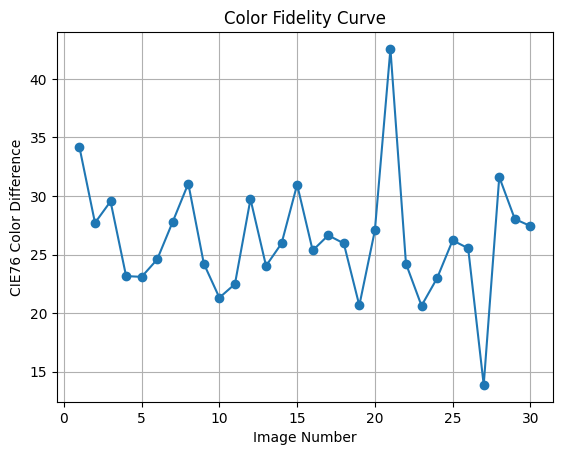

Overall Color Fidelity: 26.29


In [ ]:
import cv2
import os
import numpy as np
from skimage.color import rgb2lab
from scipy.spatial import distance
import matplotlib.pyplot as plt

# Function to calculate CIE76 color difference
def calculate_delta_e(image1, image2):
    image1_lab = rgb2lab(image1)
    image2_lab = rgb2lab(image2)

    # Flatten the 2D LAB color arrays into 1D arrays
    image1_lab_flat = image1_lab.reshape(-1, 3)
    image2_lab_flat = image2_lab.reshape(-1, 3)

    delta_e = np.mean(np.sqrt(np.sum((image1_lab_flat - image2_lab_flat) ** 2, axis=1)))

    return delta_e

# Path to the folders containing cartoon and original images
original_folder = '/content/drive/MyDrive/Input_set'  # Replace with the path to your original images folder
cartoon_folder = '/content/drive/MyDrive/cartoon_folder'  # Replace with the path to your cartoon images folder

# Lists to store color fidelity values
color_fidelity_values = []

# Assuming that both folders have the same number of images
cartoon_files = sorted(os.listdir(cartoon_folder))
original_files = sorted(os.listdir(original_folder))

for cartoon_file, original_file in zip(cartoon_files, original_files):
    # Load the images
    cartoon_image = cv2.imread(os.path.join(cartoon_folder, cartoon_file))
    original_image = cv2.imread(os.path.join(original_folder, original_file))

    # Calculate color fidelity
    delta_e = calculate_delta_e(cartoon_image, original_image)
    color_fidelity_values.append(delta_e)

# Create a curve graph
plt.plot(range(1, len(color_fidelity_values) + 1), color_fidelity_values, marker='o')
plt.title('Color Fidelity Curve')
plt.xlabel('Image Number')
plt.ylabel('CIE76 Color Difference')
plt.grid()
plt.show()

# Calculate the overall color fidelity (average)
overall_color_fidelity = np.mean(color_fidelity_values)
print(f"Overall Color Fidelity: {overall_color_fidelity:.2f}")


In [ ]:
import cv2
import os
import numpy as np
from skimage.metrics import structural_similarity as ssim

# Path to the folders containing quantized and original images
original_folder = '/content/drive/MyDrive/Input_set'  # Replace with the path to your original images folder
quantized_folder = '/content/drive/MyDrive/cartoon_folder'  # Replace with the path to your cartoon images folder

# Assuming that both folders have the same number of images
quantized_files = sorted(os.listdir(quantized_folder))
original_files = sorted(os.listdir(original_folder))

ssim_values = []

for quantized_file, original_file in zip(quantized_files, original_files):
    # Load the quantized and original images
    quantized_image = cv2.imread(os.path.join(quantized_folder, quantized_file))
    original_image = cv2.imread(os.path.join(original_folder, original_file))

    # Calculate SSIM (Structural Similarity Index)
    ssim_score = ssim(quantized_image, original_image, multichannel=True)

    ssim_values.append(ssim_score)

# Calculate the overall accuracy
average_ssim = np.mean(ssim_values)
print(f"Overall Color Quantization Accuracy (SSIM): {average_ssim:.2f}")


<ipython-input-56-3a75f110560c>:22: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(quantized_image, original_image, multichannel=True)


Overall Color Quantization Accuracy (SSIM): 0.59


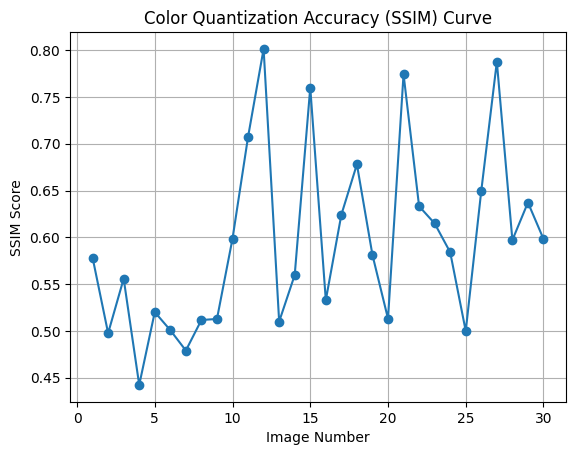

In [ ]:
plt.plot(range(1, len(ssim_values) + 1), ssim_values, marker='o')
plt.title('Color Quantization Accuracy (SSIM) Curve')
plt.xlabel('Image Number')
plt.ylabel('SSIM Score')
plt.grid()
plt.show()

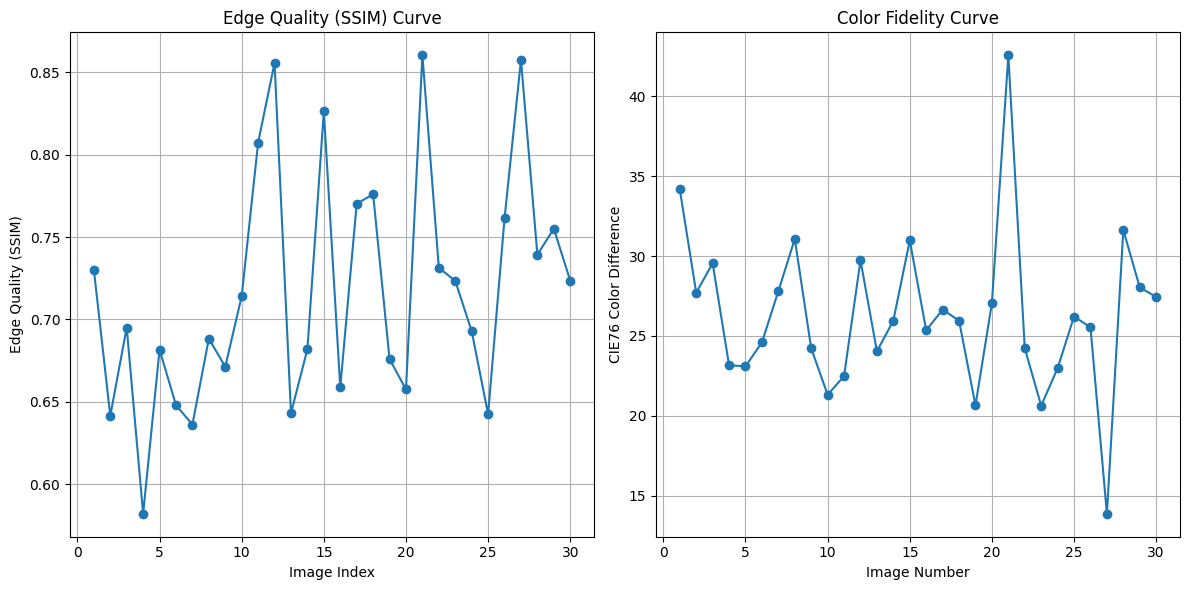

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(edge_quality_values) + 1), edge_quality_values, marker='o', linestyle='-')
plt.xlabel('Image Index')
plt.ylabel('Edge Quality (SSIM)')
plt.title('Edge Quality (SSIM) Curve')
plt.grid()

# Plot Color Fidelity Curve
plt.subplot(1, 2, 2)
plt.plot(range(1, len(color_fidelity_values) + 1), color_fidelity_values, marker='o')
plt.title('Color Fidelity Curve')
plt.xlabel('Image Number')
plt.ylabel('CIE76 Color Difference')
plt.grid()

plt.tight_layout()  # Ensure the plots do not overlap

plt.show()